# DECISION TREE ALGORITHM

**Decision Tree** is a supervised learning algorithm, that is basically a tress like structured classifier. It is used to deal with both classification and regression problems in machine learning. You can also think of a decision tree as a machine learning algorithm that uses a decision tree to make predictions, you can think of it as so when you are using the term in machine learning land.

# HOW DOES IT WORK?

# CLassify Lion and a Giraffe

# Thing you might consider

- Height
- Weight
- color
 etc...

![](../images/decisionTree1.png)

# Main parts of a decision tree include:

- Decision nodes

>Parent node

>Child node
- Leaf nodes

**Root node**: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Branches, edges or decision nodes**: This extend from the root node or other nodes above it. They ara also called sub trees.

**Decisions or leafs nodes**: These are the end of a branch that does not split into further branches. They are the outputs of the decision.

# What algorithm is used to build a decision tree?

The CART algoritm is used to construct a decision tree. CART stands for Classification And Regression Tree. At this point you might be asking yourself why the word Regression is used to name a decision tree algorithm, well decision trees are also used for Regression problems as stated earlier.

# Attribute Selection

From the examples we have seen about deciding to keep or throw away an item was quite straight forward.To select the root node and sub-nodes was quite easy. But how does decision tree algorithm decide the root node and sub-nodes to use? Decision tree algorithms use a technique known as Attribute Selection Measure ASM. There are two main ASM used:

- [Entropy and information gain](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)
> Degree of randomness
- [Gini index and information gain](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8#:~:text=Gini%20Index%2C%20also%20known%20as,it%20can%20be%20called%20pure.)

# Practical Section

In [35]:
import pandas as pd

In [36]:
iris = pd.read_csv("../datasets/Iris.csv")

In [37]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
iris["Species"] = iris["Species"].replace({"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2})

In [41]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [43]:
iris.drop(['Id'], inplace=True, axis=1)

In [44]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
x = iris.drop(["Species"], axis=1)
y = iris["Species"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=200)

In [49]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
99,5.7,2.8,4.1,1.3
92,5.8,2.6,4.0,1.2
4,5.0,3.6,1.4,0.2
97,6.2,2.9,4.3,1.3
...,...,...,...,...
42,4.4,3.2,1.3,0.2
68,6.2,2.2,4.5,1.5
16,5.4,3.9,1.3,0.4
105,7.6,3.0,6.6,2.1


In [52]:
X_test.shape

(30, 4)

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [39, 40, 41]\nclass = Iris-virginica'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 81\nvalue = [0, 40, 41]\nclass = Iris-virginica'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]\nclass = Iris-versicolor'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = Iris-versicolor'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),
 Text(128.76923076923077, 

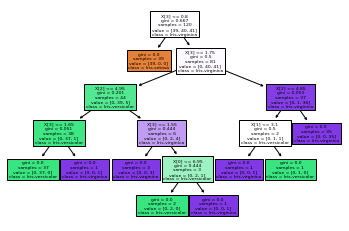

In [58]:
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtree, class_names = cn, filled=True)

In [60]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
122,7.7,2.8,6.7,2.0
28,5.2,3.4,1.4,0.2
24,4.8,3.4,1.9,0.2
75,6.6,3.0,4.4,1.4


In [61]:
y_test.head()

84     1
122    2
28     0
24     0
75     1
Name: Species, dtype: int64

In [ ]:
{"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2}

In [63]:
dtree.predict([X_test.values[0]])

array([1])

In [64]:
dtree.predict([[5, 4, 5, 2]])

array([2])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
predictions = dtree.predict(X_test)
predictions

array([1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 1])

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [70]:
cm = confusion_matrix(y_test, predictions)

In [71]:
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [72]:
import seaborn as sns

<AxesSubplot:>

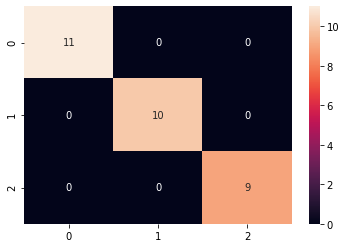

In [73]:
sns.heatmap(cm, annot=True)